In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use("Agg")
import matplotlib.animation as animation

# Reconstruction of interdependence
## 1. Effect of data misalignment

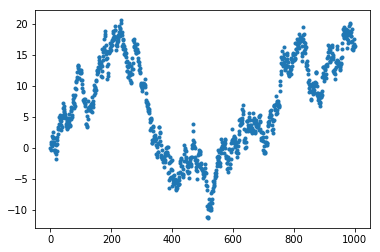

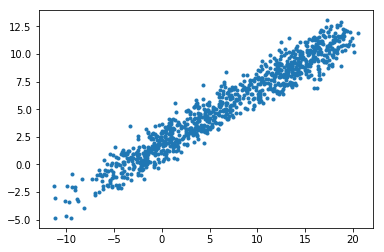

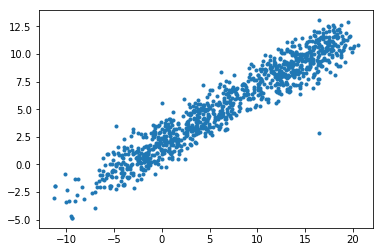

In [3]:
# LEt's generate a markov chain, which will model input
x = np.random.normal(0, 1, 1000)
xMarkov = np.zeros(1001)
for i in range(1000):
    xMarkov[i+1] = xMarkov[i] + x[i]

plt.figure()
plt.plot(xMarkov, '.')
plt.show()

# Lets define a noisy dependent variable
yMarkov = 0.5 * xMarkov + 2 + np.random.normal(0, 1, 1001)
plt.figure()
plt.plot(xMarkov, yMarkov, '.')
plt.show()

# Lets misalign x a bit now, and see what happens



def update_x(iX, xData, line):
    line.set_xdata(np.hstack((xData[iX:], xData[:iX])))
    return line,

# Set up formatting for the movie files
writer = animation.writers['ffmpeg'](fps=24, metadata=dict(artist='Me'))

# Creating a placeholder figure
fig1 = plt.figure()
line1, = plt.plot(xMarkov, yMarkov, '.')

# Creating and saving an animation
nStep = len(xMarkov)
line_ani = animation.FuncAnimation(fig1, update_x, nStep, fargs=(xMarkov, line1), repeat=False, blit=True)
line_ani.save('coolfile.avi', writer=writer)

## 2. Effect of bin size